In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

# Import time module
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23a4305507229627bb62e490c4ba021


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rungata
rungata not found. Skipping...
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | lata
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 1 | thaba nchu
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | escanaba
Processing Record 22 of Set 1 | port-gentil
Pro

Processing Record 37 of Set 4 | palmer
Processing Record 38 of Set 4 | nabire
Processing Record 39 of Set 4 | marquette
Processing Record 40 of Set 4 | abu dhabi
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | yeppoon
Processing Record 43 of Set 4 | sulangan
Processing Record 44 of Set 4 | road town
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | baykit
Processing Record 47 of Set 4 | bilma
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 50 of Set 4 | mys shmidta
mys shmidta not found. Skipping...
Processing Record 1 of Set 5 | cape canaveral
Processing Record 2 of Set 5 | bonthe
Processing Record 3 of Set 5 | bolu
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | mangrol
Processing Record 6 of Set 5 | sargur
Processing Record 7 of Set 5 | ornskoldsvik
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | deputatskiy
Processing Reco

Processing Record 23 of Set 8 | vitim
Processing Record 24 of Set 8 | maragogi
Processing Record 25 of Set 8 | shirvan
Processing Record 26 of Set 8 | morgan city
Processing Record 27 of Set 8 | beidao
Processing Record 28 of Set 8 | albufeira
Processing Record 29 of Set 8 | rio pardo de minas
Processing Record 30 of Set 8 | pontianak
Processing Record 31 of Set 8 | khromtau
Processing Record 32 of Set 8 | aseri
Processing Record 33 of Set 8 | agirish
Processing Record 34 of Set 8 | baiyin
Processing Record 35 of Set 8 | linxia
Processing Record 36 of Set 8 | kholtoson
Processing Record 37 of Set 8 | tottori
Processing Record 38 of Set 8 | omboue
Processing Record 39 of Set 8 | tarancon
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | lavello
Processing Record 42 of Set 8 | lumeje
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | domoni
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | palana
Processing Record 47 of Set 8 |

Processing Record 15 of Set 12 | andevoranto
andevoranto not found. Skipping...
Processing Record 16 of Set 12 | doha
Processing Record 17 of Set 12 | ukwa
Processing Record 18 of Set 12 | erenhot
Processing Record 19 of Set 12 | kozhva
Processing Record 20 of Set 12 | srikakulam
Processing Record 21 of Set 12 | bloemfontein
Processing Record 22 of Set 12 | paamiut
Processing Record 23 of Set 12 | longhua
Processing Record 24 of Set 12 | kuche
kuche not found. Skipping...
Processing Record 25 of Set 12 | hay river
Processing Record 26 of Set 12 | lake havasu city
Processing Record 27 of Set 12 | bichura
Processing Record 28 of Set 12 | oussouye
Processing Record 29 of Set 12 | ekhabi
Processing Record 30 of Set 12 | kailua
Processing Record 31 of Set 12 | taltal
Processing Record 32 of Set 12 | newport
Processing Record 33 of Set 12 | oreanda
oreanda not found. Skipping...
Processing Record 34 of Set 12 | longfeng
Processing Record 35 of Set 12 | northam
Processing Record 36 of Set 12 

In [7]:
city_data_df = pd.DataFrame(city_data)

In [8]:
col_reord = ['City', 'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[col_reord]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [11]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    plt.subplots(figsize=(10,6))
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_val = "r = " + str(round(r_value,2))
    text = line_eq +'\n' + r_val
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(text, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    #plt.savefig('weather_data/' +  +'Fig.png')
    
    plt.show()

In [12]:
north_city_data_df = city_data_df.loc[(city_data_df['Lat']>0)]
north_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2021-05-29 22:07:36,42.0970,-79.2353,53.19,84,90,5.99
4,Khatanga,RU,2021-05-29 22:12:18,71.9667,102.5000,39.61,75,97,8.84
5,Katsuura,JP,2021-05-29 22:12:19,35.1333,140.3000,72.10,79,99,5.26
6,Kapaa,US,2021-05-29 22:12:19,22.0752,-159.3190,82.47,66,20,1.99
7,Qaanaaq,GL,2021-05-29 22:12:19,77.4840,-69.3632,30.40,94,57,6.55


In [13]:
south_city_data_df = city_data_df.loc[(city_data_df['Lat']<0)]
south_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-05-29 22:12:17,-21.2078,-159.7750,78.85,61,20,4.61
1,Carnarvon,AU,2021-05-29 22:12:18,-24.8667,113.6333,57.27,94,3,5.75
2,Te Anau,NZ,2021-05-29 22:12:18,-45.4167,167.7167,46.40,95,100,7.45
8,Puerto Ayora,EC,2021-05-29 22:12:20,-0.7393,-90.3518,82.36,85,48,10.00
10,Rikitea,PF,2021-05-29 22:12:20,-23.1203,-134.9692,76.95,86,96,20.65


In [14]:
north_lats = north_city_data_df['Lat']
north_temps = north_city_data_df['Max Temp']
north_humidity = north_city_data_df['Humidity']
north_cloud = north_city_data_df['Cloudiness']
north_wind = north_city_data_df['Wind Speed']

south_lats = south_city_data_df['Lat']
south_temps = south_city_data_df['Max Temp']
south_humidity = south_city_data_df['Humidity']
south_cloud = south_city_data_df['Cloudiness']
south_wind = south_city_data_df['Wind Speed']

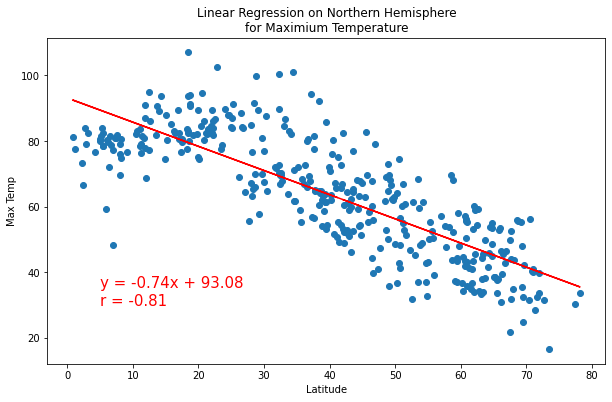

In [15]:
plot_linear_regression(north_lats, north_temps,"Linear Regression on Northern Hemisphere\nfor Maximium Temperature","Max Temp",(5,30))

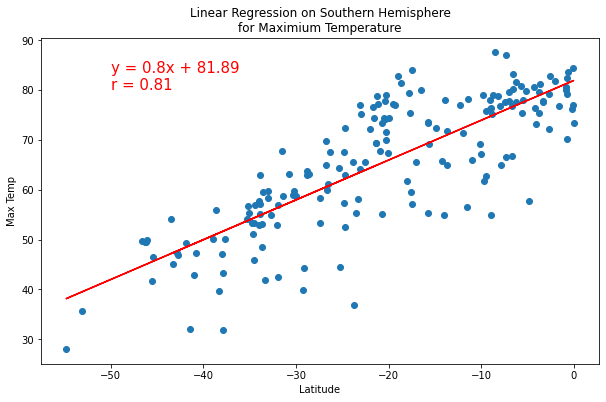

In [16]:
plot_linear_regression(south_lats, south_temps,"Linear Regression on Southern Hemisphere\nfor Maximium Temperature","Max Temp",(-50,80))

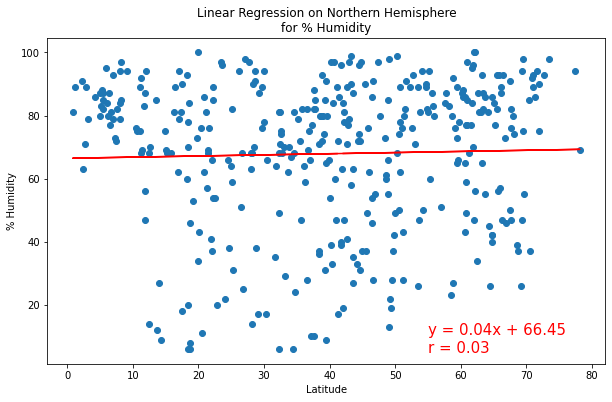

In [17]:
plot_linear_regression(north_lats, north_humidity,"Linear Regression on Northern Hemisphere\nfor % Humidity","% Humidity",(55,5))

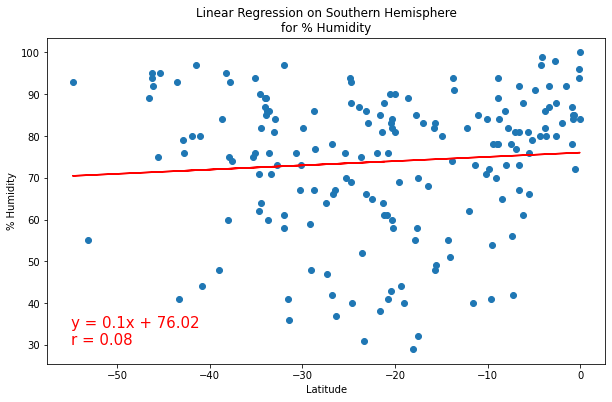

In [19]:
plot_linear_regression(south_lats, south_humidity,"Linear Regression on Southern Hemisphere\nfor % Humidity","% Humidity",(-55,30))

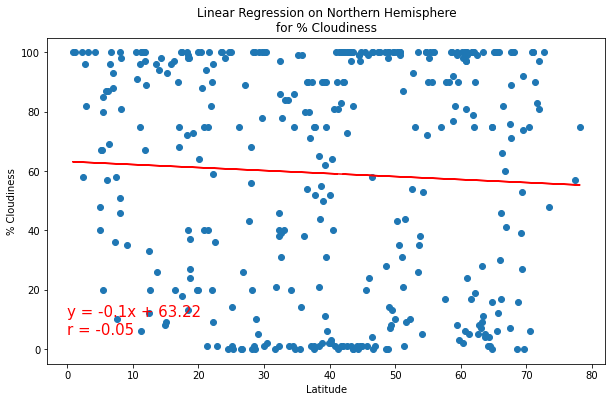

In [20]:
plot_linear_regression(north_lats, north_cloud,"Linear Regression on Northern Hemisphere\nfor % Cloudiness","% Cloudiness",(0,5))

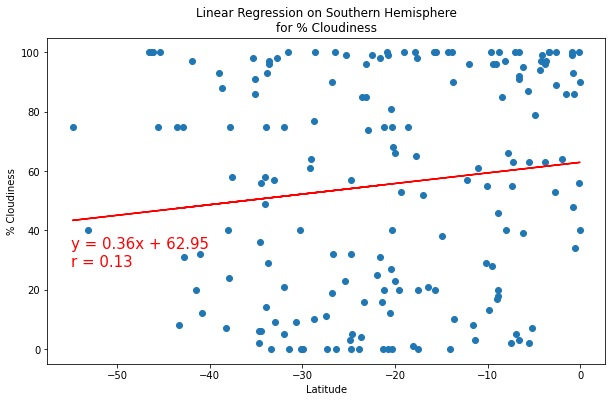

In [22]:
plot_linear_regression(south_lats, south_cloud,"Linear Regression on Southern Hemisphere\nfor % Cloudiness","% Cloudiness",(-55,28))

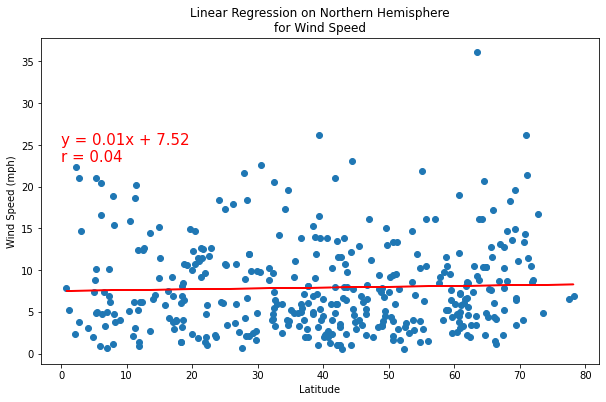

In [23]:
plot_linear_regression(north_lats, north_wind,"Linear Regression on Northern Hemisphere\nfor Wind Speed","Wind Speed (mph)",(0,23))

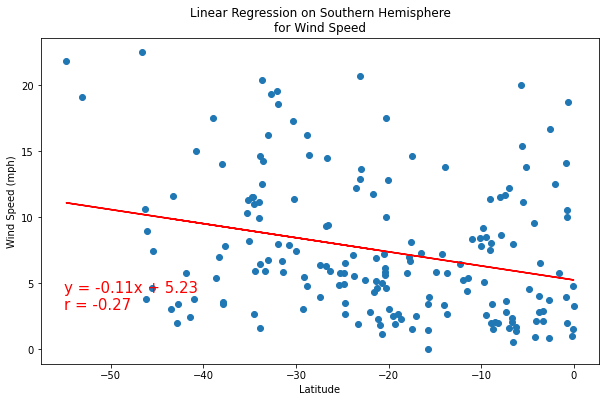

In [25]:
plot_linear_regression(south_lats, south_wind,"Linear Regression on Southern Hemisphere\nfor Wind Speed","Wind Speed (mph)",(-55,3))